<a href="https://colab.research.google.com/github/himanshu-tawra/COVID-19-Detector-Flask-App-from-Chest-X-ray-Images-with-Keras-and-Deep-Learning/blob/master/98_percent_Inception_resnet_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from glob import glob
from keras.preprocessing.image import ImageDataGenerator
import os
from keras.applications.inception_resnet_v2 import InceptionResNetV2
import keras

In [3]:
IMAGE_SIZE = [224,224]

In [4]:
inception_resnet = InceptionResNetV2(input_shape= IMAGE_SIZE + [3] , weights='imagenet',include_top=False)

219062272/219055592 [==============================] - 12s 0us/step


In [5]:
for layer in inception_resnet.layers:
  layer.trainable = False

In [6]:
inception_resnet_output = inception_resnet.output

In [7]:
flatten = Flatten()(inception_resnet_output)
Dense_layer1 = Dense(units = 256,activation=keras.layers.LeakyReLU(alpha=0.3))(flatten)
Dense_layer2 = Dense(units=128,activation=keras.layers.LeakyReLU(alpha=0.3))(Dense_layer1)
Dense_layer3 = Dense(units = 64,activation=keras.layers.LeakyReLU(alpha=0.3))(Dense_layer2)
output_layer = Dense(3,activation='softmax')(Dense_layer3)

In [8]:
model = Model(inputs = inception_resnet.input,outputs = output_layer)

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [10]:
model.compile(
    optimizer=keras.optimizers.Adam(0.000001),  # Low learning rate
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [11]:
training_data_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [12]:
val_data_gen = ImageDataGenerator(
    rescale = 1./255.
)

In [13]:
training_set = training_data_gen.flow_from_directory(
    '/content/drive/My Drive/Data/train/',
    target_size = IMAGE_SIZE,
    class_mode = 'categorical',
    batch_size = 32
)

Found 1470 images belonging to 3 classes.


In [14]:
val_set = val_data_gen.flow_from_directory(
    '/content/drive/My Drive/Data/test/',
    target_size = IMAGE_SIZE,
    class_mode = 'categorical',
    batch_size = 32
)

Found 243 images belonging to 3 classes.


In [15]:
from keras.callbacks import ModelCheckpoint
callback_list = [ModelCheckpoint('ekdm_final_inception_resnet_new.h5', monitor='val_loss', verbose=True, save_best_only=True)]

In [16]:
r = model.fit(
    training_set,
    epochs = 100,
    validation_data = val_set,
    validation_steps = len(val_set),
    steps_per_epoch = len(training_set),
    callbacks = callback_list
)

Epoch 1/100
46/46 [==============================] - 1133s 24s/step - loss: 1.1781 - accuracy: 0.4790 - val_loss: 0.6392 - val_accuracy: 0.7449

Epoch 00001: val_loss improved from inf to 0.63923, saving model to ekdm_final_inception_resnet_new.h5
Epoch 2/100
46/46 [==============================] - 69s 1s/step - loss: 0.6755 - accuracy: 0.7238 - val_loss: 0.4311 - val_accuracy: 0.8601

Epoch 00002: val_loss improved from 0.63923 to 0.43112, saving model to ekdm_final_inception_resnet_new.h5
Epoch 3/100
46/46 [==============================] - 69s 1s/step - loss: 0.5066 - accuracy: 0.8076 - val_loss: 0.3283 - val_accuracy: 0.8930

Epoch 00003: val_loss improved from 0.43112 to 0.32831, saving model to ekdm_final_inception_resnet_new.h5
Epoch 4/100
46/46 [==============================] - 68s 1s/step - loss: 0.4129 - accuracy: 0.8469 - val_loss: 0.2769 - val_accuracy: 0.9095

Epoch 00004: val_loss improved from 0.32831 to 0.27694, saving model to ekdm_final_inception_resnet_new.h5
Epoch

In [17]:
test_pred = []
test_actual = []
train_pred = []
train_actual = []
label_dict = {
    0 : "Covid",
    1 : "Normal",
    2 : "Pneumonia"
}
train_covid_path = '/content/drive/My Drive/Data/train/COVID19'
train_normal_path = '/content/drive/My Drive/Data/train/NORMAL'
train_pneumonia_path = '/content/drive/My Drive/Data/train/PNEUMONIA'


covid_path = '/content/drive/My Drive/Data/test/COVID19'
normal_path = '/content/drive/My Drive/Data/test/NORMAL'
pneumonia_path = '/content/drive/My Drive/Data/test/PNEUMONIA'

In [18]:
model.evaluate_generator(training_set,steps = 32,verbose = 1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


32/32 [==============================] - 42s 1s/step - loss: 0.0519 - accuracy: 0.9834


[0.051857758313417435, 0.9833984375]

In [19]:
model.evaluate_generator(val_set,steps = 32, verbose = 1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


32/32 [==============================] - 7s 192ms/step - loss: 0.0559 - accuracy: 0.9753


[0.055875808000564575, 0.9753086566925049]

In [20]:
def image_preprocessing(test_image):
  image_array = image.img_to_array(test_image)
  image_array = np.expand_dims(image_array,axis = 0)
  rescaled_image = image_array/255. 
  return rescaled_image

def predict_image(path):
  for filename in os.listdir(path):
    filepath = os.path.join(path,filename)
    test_image = image.load_img(filepath,target_size=(224,224))
    rescaled_image = image_preprocessing(test_image)


    predicted_image = model.predict(rescaled_image)
    predicted_image = predicted_image.argmax()
    if path == train_covid_path:
      train_pred.append(predicted_image)
      train_actual.append(0)
    elif path == covid_path:
      test_pred.append(predicted_image)
      test_actual.append(0)
    elif path == train_normal_path:
      train_pred.append(predicted_image)
      train_actual.append(1)
    elif path == normal_path:
      test_pred.append(predicted_image)
      test_actual.append(1)
    elif path == train_pneumonia_path:
      train_pred.append(predicted_image)
      train_actual.append(2)
    elif path == pneumonia_path:
      test_pred.append(predicted_image)
      test_actual.append(2)

In [21]:
predict_image(train_covid_path)

In [22]:
predict_image(train_normal_path)

In [23]:
predict_image(train_pneumonia_path)

In [24]:
predict_image(covid_path)


In [25]:
predict_image(normal_path)

In [26]:
predict_image(pneumonia_path)

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
testing_confusion_mat = confusion_matrix(test_actual,test_pred)
training_confusion_mat = confusion_matrix(train_actual,train_pred)
print(testing_confusion_mat)
print(training_confusion_mat)

[[78  2  1]
 [ 0 81  0]
 [ 0  3 78]]
[[489   0   1]
 [  0 489   1]
 [  0  19 471]]


In [28]:
def plot_confusion_matrix(confusion_mat,fig_name):

  classes = ['COVID','NORMAL','PNEUMONIA']
  tick_marks = [0.5,1.5,2.5]
  sns.heatmap(confusion_mat,cmap='plasma',annot=True,linewidth = 2,fmt = 'd')

  plt.xticks(tick_marks, classes,rotation ='vertical')
  plt.yticks(tick_marks, classes,rotation ='vertical')
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.savefig(fig_name + '.png')
  plt.margins(0.2) 

  plt.show()

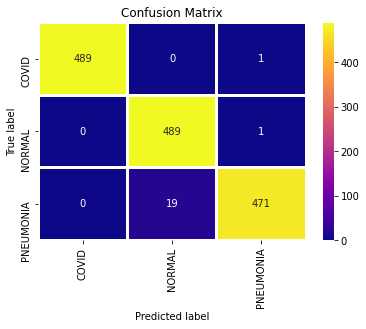

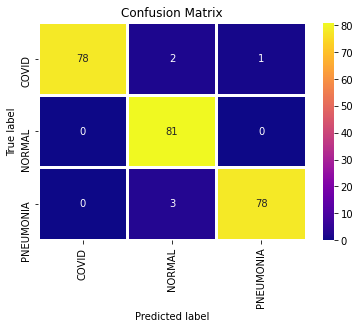

In [29]:

plot_confusion_matrix(training_confusion_mat,'Training_Confusion_Matrix')
plot_confusion_matrix(testing_confusion_mat,'Testing_Confusion_Matrix')

In [30]:

from sklearn.metrics import classification_report
print(classification_report(train_actual, train_pred,labels = [0,1,2],target_names=["Covid","Normal","Pneumonia"]))
print(classification_report(test_actual, test_pred,labels = [0,1,2],target_names=["Covid","Normal","Pneumonia"]))

              precision    recall  f1-score   support

       Covid       1.00      1.00      1.00       490
      Normal       0.96      1.00      0.98       490
   Pneumonia       1.00      0.96      0.98       490

    accuracy                           0.99      1470
   macro avg       0.99      0.99      0.99      1470
weighted avg       0.99      0.99      0.99      1470

              precision    recall  f1-score   support

       Covid       1.00      0.96      0.98        81
      Normal       0.94      1.00      0.97        81
   Pneumonia       0.99      0.96      0.97        81

    accuracy                           0.98       243
   macro avg       0.98      0.98      0.98       243
weighted avg       0.98      0.98      0.98       243



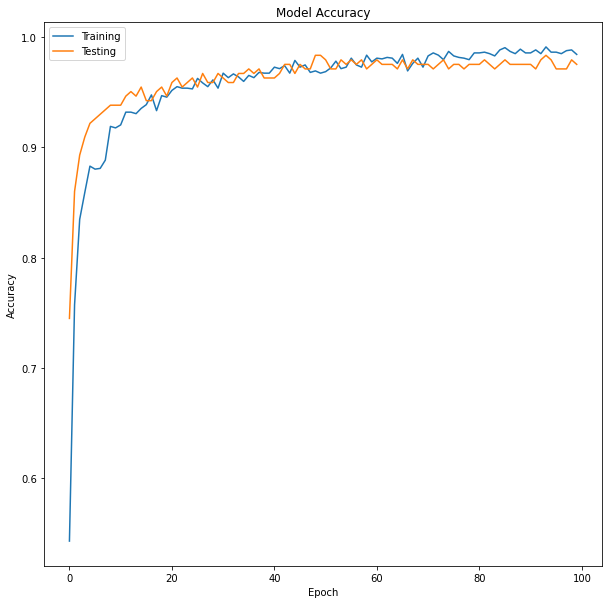

In [31]:
plt.figure(figsize=(10,10))

plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('xception_chest_accuracy.png')
plt.show()

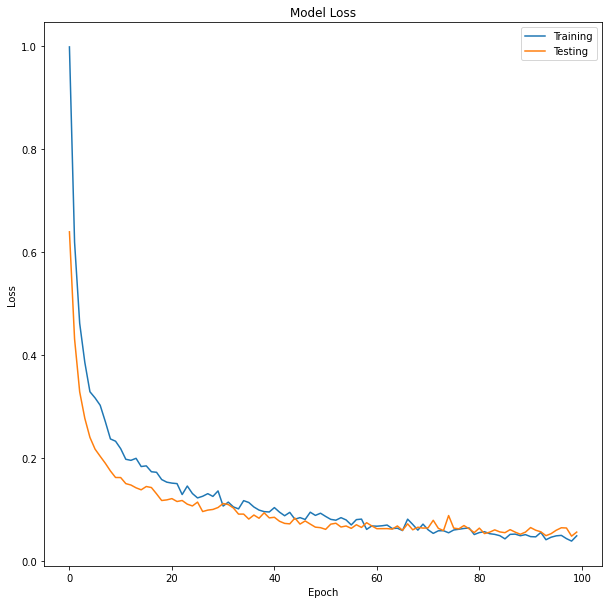

In [32]:

plt.figure(figsize=(10,10))

plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('xception_chest_loss.png')
plt.show()